## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

## Data Preprocessing

First, we read in the dataset.

In [2]:
#| label: dataset-preview

# Run these commands when running notebooks on Jupyter, or locally.

df = pd.read_csv("../data/wind.csv")
df.head(5)

,id,lat,long,state,farm_type,wind_speed,lcoe,capacity,capacity_factor,available_wind_power,available_energy,generated_energy,cost
0,0,25.896492,-97.460358,Texas,onshore,7.46,31,2,0.433,1.997163,17495.14630,7575.398348,4.696747e+06
1,1,26.032654,-97.738098,Texas,onshore,7.45,31,10,0.414,9.945710,87124.42376,36069.511440,2.236310e+07
2,2,26.059063,-97.208252,Texas,onshore,8.18,31,2,0.506,2.633037,23065.40088,11671.092850,7.236078e+06
3,3,26.078449,-98.073364,Texas,onshore,7.17,31,16,0.363,14.185493,124264.92160,45108.166540,2.796706e+07
4,4,26.143227,-98.311340,Texas,onshore,7.06,31,16,0.358,13.542570,118632.91080,42470.582050,2.633176e+07


In [3]:
# Run these commands when running the notebooks on Google Colab.

df = pd.read_csv('https://raw.githubusercontent.com/ReadyResearchers-2023-24/aidanneeson-renewable-ml/main/data/wind.csv')
df.head(5)

,id,lat,long,state,farm_type,wind_speed,lcoe,capacity,capacity_factor,available_wind_power,available_energy,generated_energy,cost
0,0,25.896492,-97.460358,Texas,onshore,7.46,31,2,0.433,1.997163,17495.14630,7575.398348,4.696747e+06
1,1,26.032654,-97.738098,Texas,onshore,7.45,31,10,0.414,9.945710,87124.42376,36069.511440,2.236310e+07
2,2,26.059063,-97.208252,Texas,onshore,8.18,31,2,0.506,2.633037,23065.40088,11671.092850,7.236078e+06
3,3,26.078449,-98.073364,Texas,onshore,7.17,31,16,0.363,14.185493,124264.92160,45108.166540,2.796706e+07
4,4,26.143227,-98.311340,Texas,onshore,7.06,31,16,0.358,13.542570,118632.91080,42470.582050,2.633176e+07


Now, we must shuffle the datasets to reduce bias.

In [3]:
#| label: shuffled-dataset-preview

df = df.sample(frac=1)
df.head(5)

,id,lat,long,state,farm_type,wind_speed,lcoe,capacity,capacity_factor,available_wind_power,available_energy,generated_energy,cost
79744,79744,43.146877,-82.945618,Michigan,onshore,7.18,32,16,0.431,14.244930,124785.58400,53782.58670,34420855.49
97161,97161,45.597183,-104.014069,South Dakota,onshore,7.69,30,16,0.396,17.501126,153309.86550,60710.70672,36426424.03
979,979,29.375134,-90.818909,Louisiana,onshore,6.15,50,16,0.307,8.951840,78418.12075,24074.36307,24074363.07
110376,110376,48.992310,-101.517090,North Dakota,onshore,7.44,30,16,0.408,15.849143,138838.49260,56646.10498,33987662.99
46495,46495,40.798595,-88.867004,Illinois,onshore,7.34,36,14,0.405,13.316289,116650.69100,47243.52987,34015341.51


Looking at each dataset, we can identify which variables we want to use for our models.

In [4]:
X = df.loc[:, ['lat','long','capacity']]
y = df.loc[:, ['generated_energy','cost']]

Now we split into training and testing sets, reserving about 80% for training and 20% for testing.

In [5]:
X_train = X[:100000]
X_test = X[100000:]
y_train = y[:100000]
y_test = y[100000:]

Models typically perform better when input values are within a certain range, like [-1, 1] for example. We scale the data points appropriately.

In [6]:
#| label: scaled-data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.59757844,  1.33120197,  0.51419331],
       [ 1.15920501, -0.44453102,  0.51419331],
       [-2.55899743,  0.66760964,  0.51419331],
       ...,
       [ 0.28400189, -0.71009965,  0.51419331],
       [-0.42856715, -1.06174499, -0.07960454],
       [-1.26252269, -0.57359601, -0.07960454]])

## Training the Models

Now that the data is pre-processed accordingly, the models can be trained and fit.

In [22]:
reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(4,), max_iter=100000000000)
reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(4,), max_iter=100000000000, solver='lbfgs')

With a trained model, predictions can now be made.

In [23]:
#| label: prediction-comparisons

display = y_test.reset_index()
preds = reg.predict(X_test)
print("Predictions")
print("----------------------")
for i in range(3):
    print(f"predicted energy: {preds[i][0]:.2f}\tactual energy: {display.at[i, 'generated_energy']:.2f}\tpredicted cost: {preds[i][1]:.2f}\tactual cost: {display.at[i, 'cost']:.2f}")

Predictions
----------------------
predicted energy: 67701.71	actual energy: 24145.95	predicted cost: 45421920.70	actual cost: 28492225.26
predicted energy: 51943.76	actual energy: 34637.88	predicted cost: 36780099.30	actual cost: 22860998.02
predicted energy: 65571.38	actual energy: 66479.65	predicted cost: 43653964.82	actual cost: 39887787.57


## Testing and Analyzing the Models

This section contains metrics gathering and other figures that visualize the models and its results.

### Metrics

#### Scores and Error Values

The score being recored are the R2 score, Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

In [24]:
#| label: metrics

r2 = metrics.r2_score(y_test, preds, multioutput="raw_values")
rmse = metrics.root_mean_squared_error(y_test, preds, multioutput="raw_values")
mape = metrics.mean_absolute_percentage_error(y_test, preds, multioutput="raw_values")

print("Metric\tScore")
print("-----------------------")
print(f"r2\t{r2}\nrmse\t{rmse}\nmape\t{mape}")

Metric	Score
-----------------------
r2	[0.19333991 0.19953254]
rmse	[   28635.94093632 17726324.27849805]
mape	[0.80743714 0.62410014]


#### K-Fold Cross Validation

This cross validation splits up the dataset into 10 unique folds, which are then used to test a model. The model is then scored using the same metrics outlined above: R2, RMSE, MAPE. This ensures the scoring is rigorous, and the *entire* dataset is used.

In [29]:
#| label: k-fold-cross-validation-table

kf = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_validate(reg, X, y, cv=kf, scoring={"r2":metrics.make_scorer(score_func=metrics.r2_score),
 "rmse":metrics.make_scorer(score_func=metrics.root_mean_squared_error),
 "mape":metrics.make_scorer(score_func=metrics.mean_absolute_percentage_error)})
kf_cv_df = pd.DataFrame.from_dict(kf_cv_scores)
means = kf_cv_df.mean()
print("10-Fold Cross Validation Scores")
print("----------------------------------------------------")
print(f"R2 Average: {means.iloc[2]}")
print(f"RMSE Average: {means.iloc[3]}")
print(f"MAPE Average: {means.iloc[4]}")
kf_cv_df

10-Fold Cross Validation Scores
----------------------------------------------------
R2 Average: 0.17550572322297842
RMSE Average: 8955297.046558464
MAPE Average: 0.7180028050220215


,fit_time,score_time,test_r2,test_rmse,test_mape
0,2.288576,0.003992,0.189615,8.928638e+06,0.654504
1,0.733644,0.004988,0.191056,8.854147e+06,0.730762
2,0.715144,0.003999,0.186500,8.930511e+06,0.652372
3,3.342753,0.004004,0.196500,8.899258e+06,0.715955
4,1.022440,0.012998,0.196300,8.833933e+06,0.677797
5,7.003229,0.003998,0.201263,8.808617e+06,0.666556
6,0.753272,0.004013,-0.000947,9.860140e+06,1.071770
7,0.807899,0.004000,0.200553,8.879911e+06,0.647242
8,0.673103,0.003997,0.204381,8.752960e+06,0.685099
9,1.356002,0.002999,0.189836,8.804856e+06,0.677972


### Graphs

Graphs of the neural network fits on each of the input features, for each target.

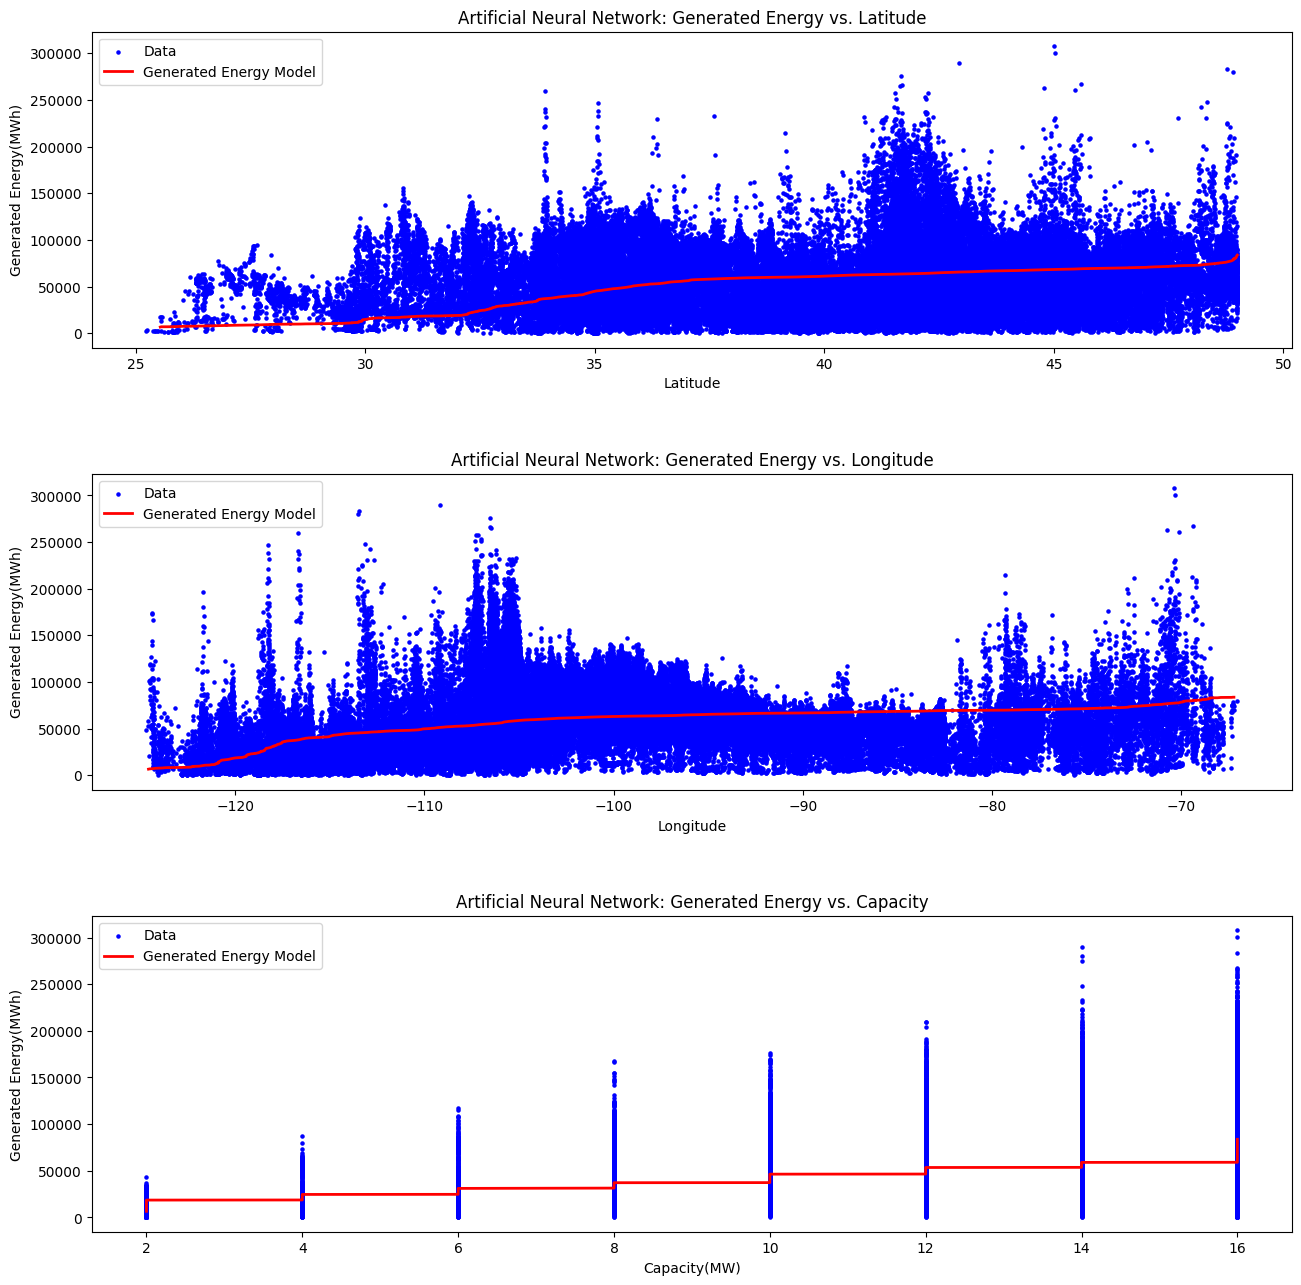

In [30]:
#| label: fig-generated-energy-vs-input-features

plot_lat_x = X[100000:].loc[:,['lat']].sort_values(by=['lat'])
plot_long_x = X[100000:].loc[:,['long']].sort_values(by=['long'])
plot_cap_x = X[100000:].loc[:,['capacity']].sort_values(by=['capacity'])
plot_energy_y = pd.DataFrame(preds).loc[:,[0]].sort_values(by=[0])

figure, axis = plt.subplots(3)

figure.set_size_inches(15,15)

axis[0].scatter(X.loc[:,["lat"]], y.loc[:,['generated_energy']], color='blue', label='Data', s=5)
axis[0].plot(plot_lat_x, plot_energy_y, color='red',lw=2, label="Generated Energy Model")
axis[0].set_xlabel("Latitude")
axis[0].set_ylabel("Generated Energy(MWh)")
axis[0].set_title("Artificial Neural Network: Generated Energy vs. Latitude")
axis[0].legend()

axis[1].scatter(X.loc[:,["long"]], y.loc[:,['generated_energy']], color='blue', label='Data', s=5)
axis[1].plot(plot_long_x, plot_energy_y, color='red',lw=2, label="Generated Energy Model")
axis[1].set_xlabel("Longitude")
axis[1].set_ylabel("Generated Energy(MWh)")
axis[1].set_title("Artificial Neural Network: Generated Energy vs. Longitude")
axis[1].legend()

axis[2].scatter(X.loc[:,["capacity"]], y.loc[:,['generated_energy']], color='blue', label='Data', s=5)
axis[2].plot(plot_cap_x, plot_energy_y, color='red',lw=2, label="Generated Energy Model")
axis[2].set_xlabel("Capacity(MW)")
axis[2].set_ylabel("Generated Energy(MWh)")
axis[2].set_title("Artificial Neural Network: Generated Energy vs. Capacity")
axis[2].legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=.4, 
                    hspace=.4)

plt.show()

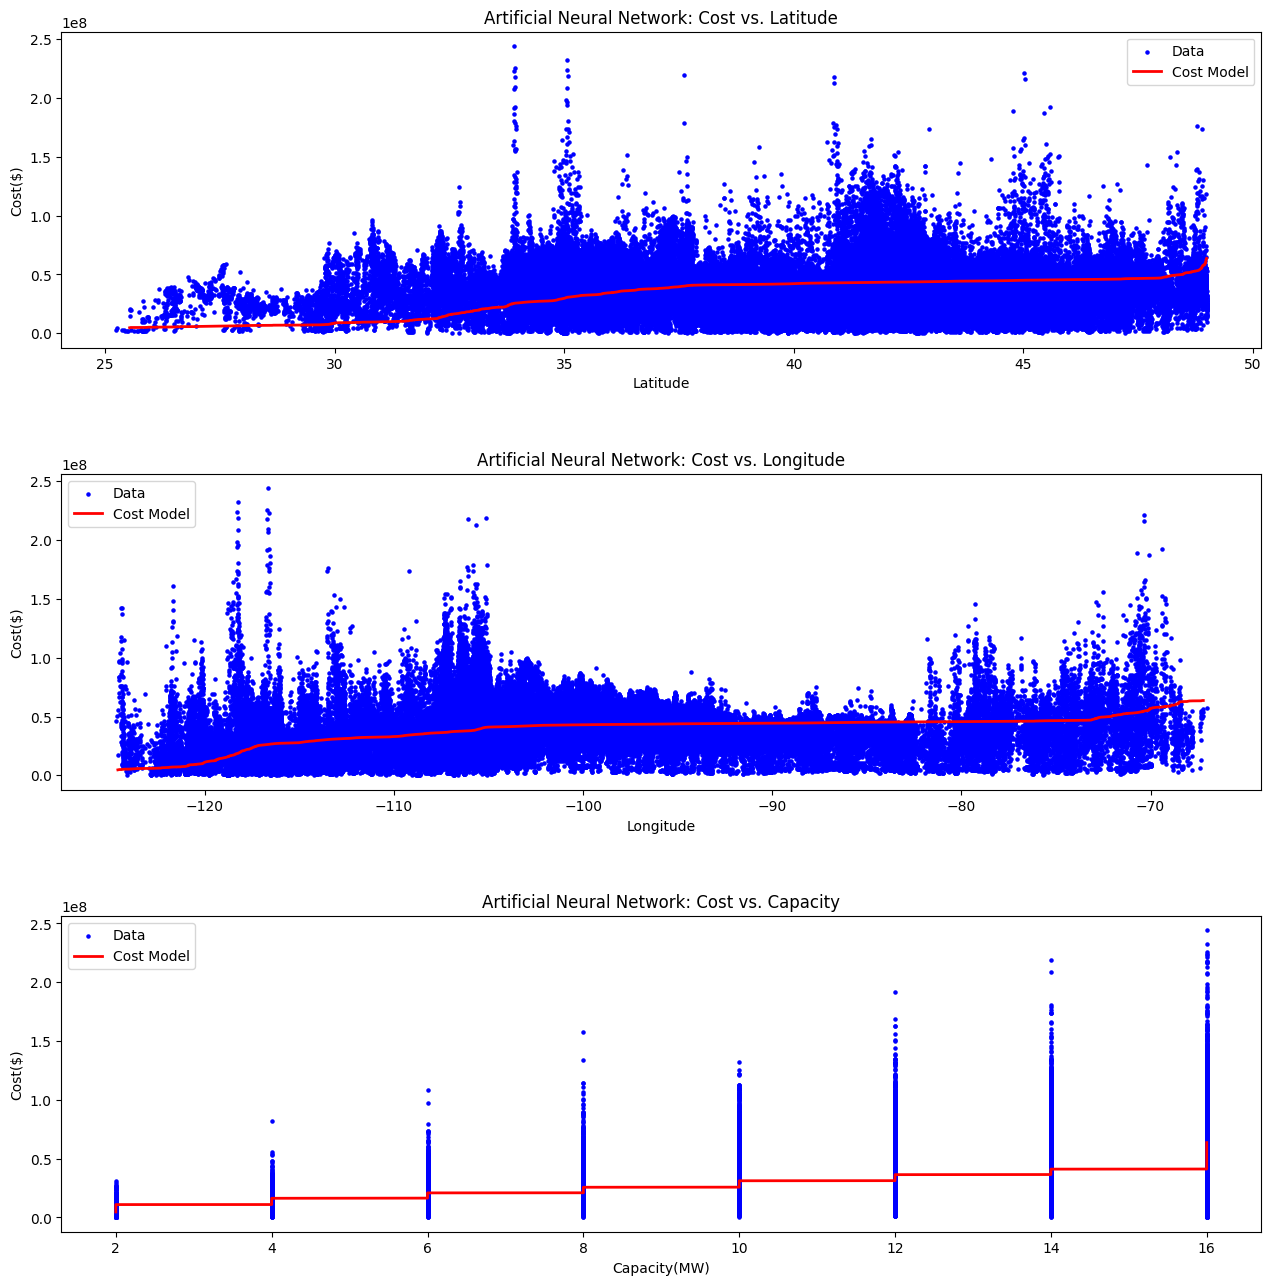

In [31]:
#| label: fig-cost-vs-input-features

plot_cost_y = pd.DataFrame(preds).loc[:,[1]].sort_values(by=[1])

figure, axis = plt.subplots(3)

figure.set_size_inches(15,15)

axis[0].scatter(X.loc[:,["lat"]], y.loc[:,['cost']], color='blue', label='Data', s=5)
axis[0].plot(plot_lat_x, plot_cost_y, color='red',lw=2, label="Cost Model")
axis[0].set_xlabel("Latitude")
axis[0].set_ylabel("Cost($)")
axis[0].set_title("Artificial Neural Network: Cost vs. Latitude")
axis[0].legend()

axis[1].scatter(X.loc[:,["long"]], y.loc[:,['cost']], color='blue', label='Data', s=5)
axis[1].plot(plot_long_x, plot_cost_y, color='red',lw=2, label="Cost Model")
axis[1].set_xlabel("Longitude")
axis[1].set_ylabel("Cost($)")
axis[1].set_title("Artificial Neural Network: Cost vs. Longitude")
axis[1].legend()

axis[2].scatter(X.loc[:,["capacity"]], y.loc[:,['cost']], color='blue', label='Data', s=5)
axis[2].plot(plot_cap_x, plot_cost_y, color='red',lw=2, label="Cost Model")
axis[2].set_xlabel("Capacity(MW)")
axis[2].set_ylabel("Cost($)")
axis[2].set_title("Artificial Neural Network: Cost vs. Capacity")
axis[2].legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=.4, 
                    hspace=.4)

plt.show()

A Graph that models the structure of a nueral network as a visual aid.

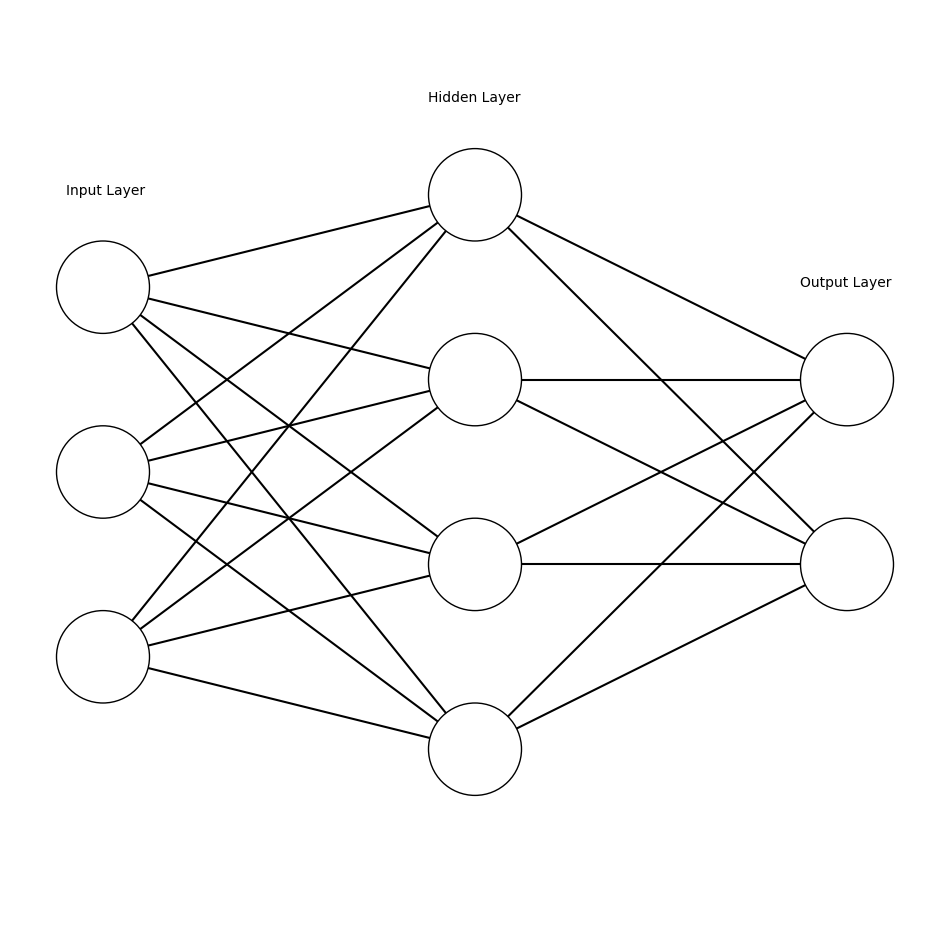

In [6]:
#| label: fig-ann-diagram

# Code originally comes from @craffel on GitHub: https://gist.github.com/craffel/2d727968c3aaebd10359
# Updates were made to make it compatible with Python 3
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 4, 2])

plt.text(.06, .80, "Input Layer")
plt.text(.45, .90, "Hidden Layer")
plt.text(.85, .70, "Output Layer")

plt.show()